# How Significant Is A Boxplot Outlier?

<img src="https://imgs.xkcd.com/comics/boyfriend.png">

*It is common to boxplot as an informal test for the existence of outliers. While the procedure is useful, it should be used with caution, as at least **30% of samples from a normally-distributed population** of any size will be flagged as containing an outlier, while for small samples (N<10) even extreme outliers indicate little. This fact is most easily seen using a simulation, which ideally students should perform for themselves.*

Journal of Statistics Education Volume 19, Number 2(2011), www.amstat.org/publications/jse/v19n2/dawson.pdf  
Robert Dawson, Saint Mary’s University

That is, if a data point is below Q1 – 1.5*IQR or above Q3 + 1.5*IQR, it is viewed as being too far from the central values to be reasonable.

How does this work with data that is normally distributed? Remember the rule of 68-95.99.7...

<img src="https://upload.wikimedia.org/wikipedia/commons/2/22/Empirical_rule_histogram.svg">

In [35]:
%matplotlib inline

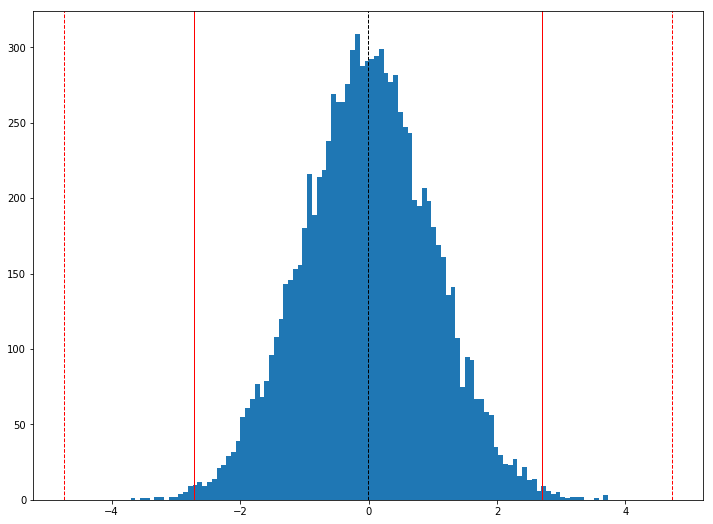

In [37]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# We can create samples from many distributions using built-in numpy functions.
# To generate a random sample of n normally distributed values with mean 0 and variance 1

n = 10000
normal_sample = np.random.normal(size=(n,1))

plt.hist(normal_sample,100)

# Indicate the mean
plt.axvline(normal_sample.mean(), color='k', linestyle='dashed', linewidth=1)

# Compute the 25th, 50th, and 75th percentiles for the data
Q1, Q2, Q3 = np.percentile(normal_sample, [25,50,75])

# The interquartile range (IQR) is the difference between the 75th and 25th percentile of the data.
# It is a measure of the dispersion similar to standard deviation or variance, but is much more robust
# against outliers
IQR = Q3 - Q1

# Indicate the inner and outer guides computed from the IQR
inner_range = (Q1 - 1.5*IQR, Q3 + 1.5*IQR)
outer_range = (Q1 - 3.0*IQR, Q3 + 3.0*IQR)
plt.axvline(inner_range[0], color='r', linestyle='solid', linewidth=1)
plt.axvline(inner_range[1], color='r', linestyle='solid', linewidth=1)

plt.axvline(outer_range[0], color='r', linestyle='dashed', linewidth=1)
plt.axvline(outer_range[1], color='r', linestyle='dashed', linewidth=1)

plt.rcParams["figure.figsize"] =(12,9)

[Text(0.5,0,'')]

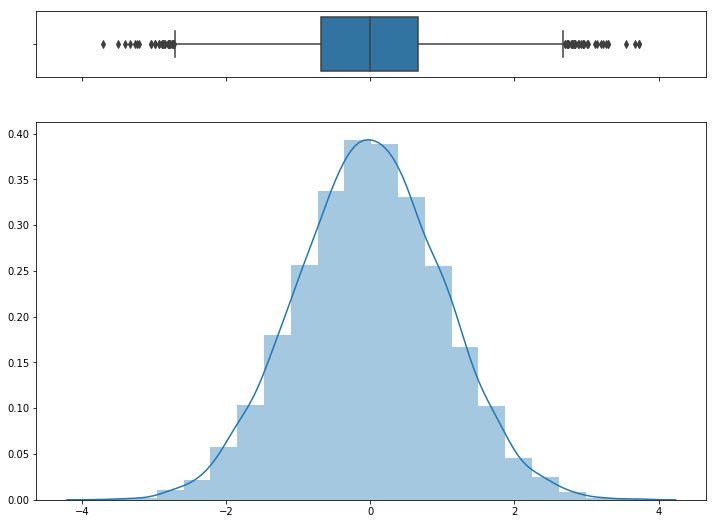

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(normal_sample, whis=1.5, ax=ax_box)
sns.distplot(normal_sample, bins=20, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

In [54]:
import pandas as pd

# Number of samples to draw in each experiment
sample_sizes = [5, 9, 13, 17, 21]

# Number of trials to run simulation for each number of samples
N = 10000

output_results = {}

for s in sample_sizes:

    count = 0
    for i in range(N):

        # generate a random sample of normally distributed values with mean 0 and variance 1
        normal_sample = np.random.normal(size=(s,1))
        n, min_max, mean, var, skew, kurt = stats.describe(normal_sample)

        # Compute the 25th, 50th, and 75th percentiles for the data
        Q1, Q2, Q3 = np.percentile(normal_sample, [25,50,75])

        # The interquartile range (IQR) is the difference between the 75th and 25th percentile of the data.
        # It is a measure of the dispersion similar to standard deviation or variance, but is much more robust
        # against outliers
        IQR = Q3 - Q1

        inner = (Q1 - 1.5*IQR, Q3 + 1.5*IQR)
        outer = (Q1 - 3.0*IQR, Q3 + 3.0*IQR)

        # find samples which are outside the inner range, but inside the outer range
        outside_inner = (normal_sample >= inner[0]) & (normal_sample <= inner[1])
        inside_outer = (normal_sample >= outer[0]) & (normal_sample <= outer[1])

        # if there are any such samples, we say that the boxplot method found suspect outliers, record the result
        if any(~outside_inner & inside_outer):
            count += 1

    output_results[s] = [count]

In [55]:
df = pd.DataFrame(output_results)
df

,5,9,13,17,21
0,2337,2817,2979,2959,3149


If we consider the boxplot as an informal test of the Null Hypothesis that the sample is from a normally-distributed (and uncontaminated) population, a flagged outlier in a properly-distributed sample corresponds to a “Type I error”. But, as we have just seen, whatever the sample size, the $\alpha$ of such a test is never less than 30%!!

Thus, the existence of a datum flagged as a mild outlier can never be taken, on its own, as significant evidence against the purity of the sample or the normality of the population.